In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


ING_DATA = pd.read_csv('ing_hub_221219_160208.csv')
ING_DATA['Date'] = pd.to_datetime(ING_DATA['Date'], format='%d/%m/%Y')
ING_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         7729 non-null   datetime64[ns]
 1   Description  7729 non-null   object        
 2   Credit       940 non-null    float64       
 3   Debit        6789 non-null   float64       
 4   Balance      7729 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 302.0+ KB


In [2]:
date_balance = ING_DATA.loc[ :, ['Date', 'Balance']]
print(date_balance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     7729 non-null   datetime64[ns]
 1   Balance  7729 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 120.9 KB
None


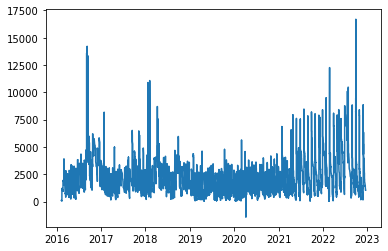

In [3]:
plt.plot(date_balance['Date'] ,date_balance['Balance'])
plt.show()

In [4]:
# Must contain 'Utility'
utility = ING_DATA[ING_DATA["Description"].str.contains("Utility")].copy()
# Must not contain
utility = utility[~utility['Description'].str.contains('Neg Utility')]
utility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 107 to 6543
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         178 non-null    datetime64[ns]
 1   Description  178 non-null    object        
 2   Credit       0 non-null      float64       
 3   Debit        178 non-null    float64       
 4   Balance      178 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 8.3+ KB


In [5]:
utility['Description'] = utility['Description'].str[:30]
print(utility.head())


          Date                     Description  Credit   Debit  Balance
107 2022-11-29  Utility - Transfer to Rodney C     NaN  -770.0  8006.46
114 2022-11-28  Utility - Transfer to Rodney C     NaN  -130.0  1272.44
248 2022-10-29  Utility - Transfer to Rodney C     NaN -2000.0  3017.24
251 2022-10-29  Utility - Transfer to Rodney C     NaN  -760.0  7118.02
423 2022-10-01  Utility - Transfer to Rodney C     NaN -4500.0  3956.15


In [6]:
des_entries = utility['Description'].unique()
print(des_entries.size)
print(des_entries)

3
['Utility - Transfer to Rodney C' 'Utility - BPAY Bill Payment - '
 'Utility - Internal Transfer - ']


<class 'pandas.core.series.Series'>
MultiIndex: 61 entries, (2017, 9) to (2022, 11)
Series name: Debit
Non-Null Count  Dtype  
--------------  -----  
61 non-null     float64
dtypes: float64(1)
memory usage: 860.0 bytes


<AxesSubplot:xlabel='Date,Date'>

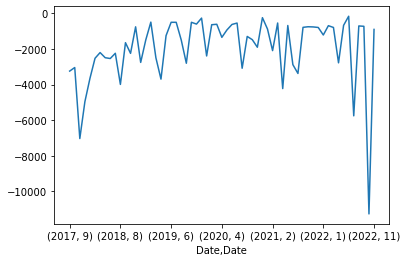

In [7]:
summary_by_month = utility.groupby([utility.Date.dt.year, utility.Date.dt.month])['Debit'].sum()
summary_by_month.info()
summary_by_month.head()
summary_by_month.plot()

<class 'pandas.core.series.Series'>
Int64Index: 6 entries, 2017 to 2022
Series name: Debit
Non-Null Count  Dtype  
--------------  -----  
6 non-null      float64
dtypes: float64(1)
memory usage: 96.0 bytes
2017 -18268.0
2018 -27011.0
2019 -16083.0
2020 -15064.0
2021 -17745.6
2022 -25640.57


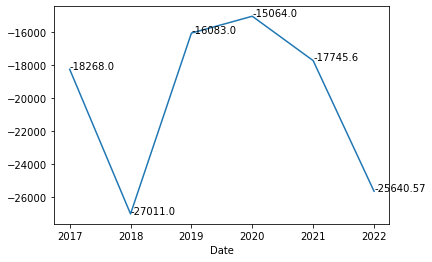

In [8]:
summary_by_year = utility.groupby([utility.Date.dt.year])['Debit'].sum()
summary_by_year.info()
summary_by_year.head()


fig, ax = plt.subplots()
summary_by_year.plot(ax=ax)
for d, v in summary_by_year.items():
    print(d, v)
    ax.annotate(v, (d, v))




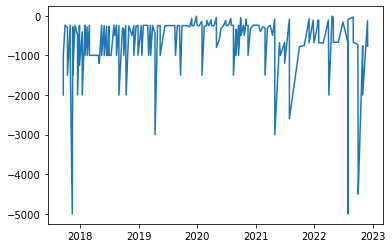

In [9]:
plt.plot(utility['Date'] ,utility['Debit'])
plt.show()